<a href="https://colab.research.google.com/github/prapti814/ML/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 70% 152M/218M [00:00<00:00, 1.58GB/s]
100% 218M/218M [00:00<00:00, 951MB/s] 


In [4]:
!unzip -q /content/cat-and-dog.zip -d /content/cat-and-dog

In [5]:
import tensorflow as tf


train_dir = '/content/cat-and-dog/training_set/training_set'
test_dir = '/content/cat-and-dog/test_set/test_set'

# Set image dimensions and batch size
img_height = 128
img_width = 128
batch_size = 32

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load the testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

print("Training dataset loaded successfully.")
print("Testing dataset loaded successfully.")

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Training dataset loaded successfully.
Testing dataset loaded successfully.


In [6]:
def process_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [7]:
train_ds= train_ds.map(process_images)
test_ds= test_ds.map(process_images)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [9]:
conv_base= VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
conv_base.trainable=False

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.7867 - loss: 0.5145 - val_accuracy: 0.8804 - val_loss: 0.2756
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.8919 - loss: 0.2534 - val_accuracy: 0.8670 - val_loss: 0.3041
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9109 - loss: 0.2001 - val_accuracy: 0.8868 - val_loss: 0.2691
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9426 - loss: 0.1529 - val_accuracy: 0.8863 - val_loss: 0.2853
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9474 - loss: 0.1376 - val_accuracy: 0.8532 - val_loss: 0.3941
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.9491 - loss: 0.1262 - val_accuracy: 0.8873 - val_loss: 0.3162
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9654 - loss: 0.0914 - val_accuracy: 0.8705 - val_loss: 0.4000
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9819 - loss: 0.0624 -

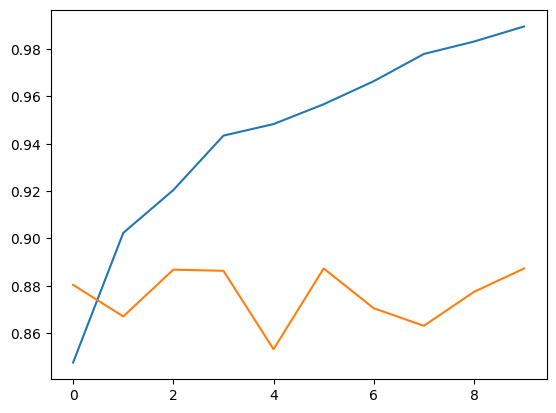

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

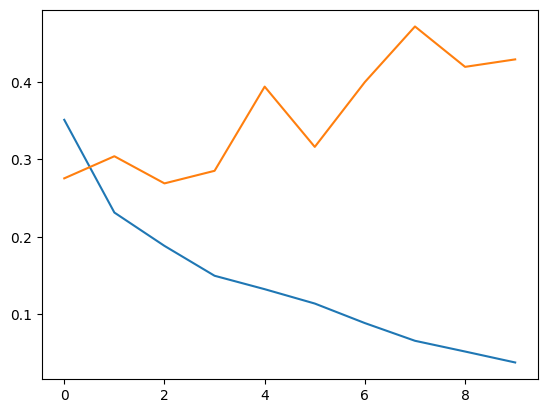

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
import cv2
test_img=cv2.imread('/content/cat.jpg')
test_img=cv2.resize(test_img,(128,128))

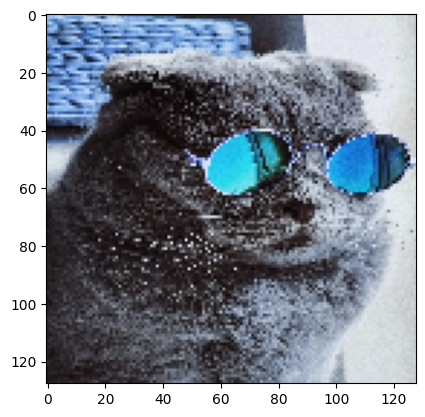

In [17]:
plt.imshow(test_img)

In [18]:
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dog


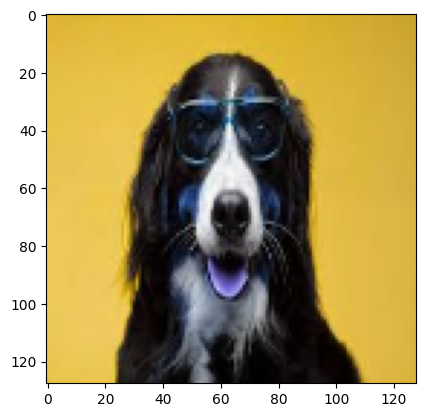

In [19]:
test_img=cv2.imread('/content/dogwithglass.jpg')
test_img=cv2.resize(test_img,(128,128))
plt.imshow(test_img)
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dog


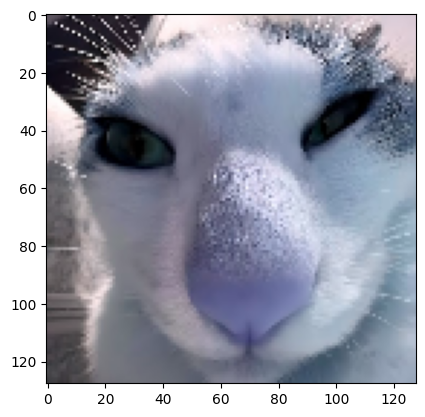

In [21]:
test_img=cv2.imread('/content/funny_cat.jpg')
test_img=cv2.resize(test_img,(128,128))
plt.imshow(test_img)
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dog


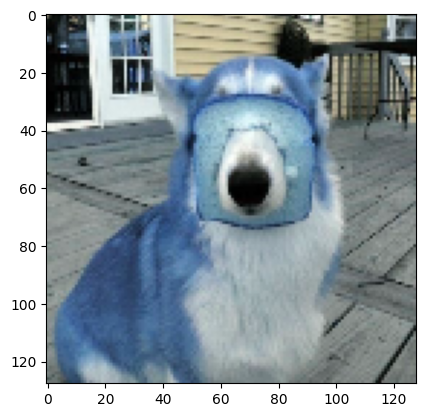

In [22]:
test_img=cv2.imread('/content/dog&bread.jpg')
test_img=cv2.resize(test_img,(128,128))
plt.imshow(test_img)
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Dog


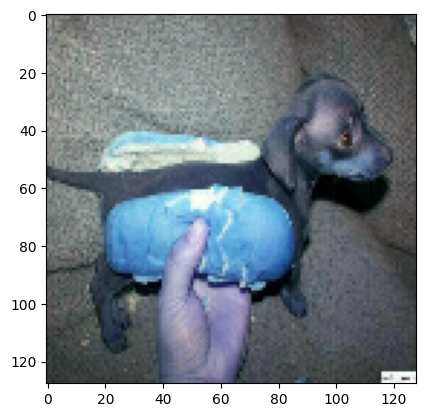

In [23]:
test_img=cv2.imread('/content/hotdog.jpg')
test_img=cv2.resize(test_img,(128,128))
plt.imshow(test_img)
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")